# The Relationship Between COVID-19 Infection Rates and Social and Economic Factors

## Project Description

In this project, I attempt to do several things. First, I examine global infection rates of COVID-19. Second, I examine the infection rates in the United States, and compare the U.S. rates with other countries. Finally, I develop a regression model that predicts a country's maximum infection rate of COVID-19.

## Research Problem

My main research problems are the following:
1. What do the COVID-19 infection numbers look like across the globe?
2. What is the infection rate for the United States?
3. How does the U.S. infection rate compare to the infection rates of similar countries in different parts of the world?
4. Are there positive correlations between a country's infection rate and certain social and economic factors?
5. Can we build a regression model that predicts a country's infection rate?

## Methodology and Strategy

This project employs several data science tools and strategies. The project proceeds as follows:
1. Import necessary libraries and modules
2. Import the data
3. Perform initial feature selection
4. Perform exploratory data anlalysis
5. Calculate the maximum infection rates for countries
6. Clean, process, and merge the data
7. Analyze correlation and construct simple linear regression models using Pearson correlation coefficients and P-values
8. Build a multiple linear regression model and evaluate them using R-squared
9. Discuss and summarize the results

## Acknowledgements

Special thanks to *Johns Hopkins University* for compiling the COVID-19 data. The particular dataset for confirmed COVID-19 cases was provided by *The Humanitarian Data Exchange*. The dataset can be downloaded here: https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases?force_layout=desktop#

I want to also thank the Sustainable Development Solutions Network for providing the *2020 World Happiness Report*. The data can be retrieved at this site: https://worldhappiness.report/ed/2020/

Finally, I want to thank Ahmad Varasteh for providing several bits of code that helped me develop this project. The code he wrote for the for loop to get maximum infection rates for each country was incredibly useful.

## 1. Importing Libraries

In [1]:
# Import the necessary libraries and modules
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

from scipy import stats

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

import warnings
warnings.filterwarnings("ignore")

print("All libraries and modules are imported.")

All libraries and modules are imported.


## 2. Import the Data

In [2]:
# Load the COVID 19 csv file
file1 = "C:/Users/adams/Desktop/Data Science/Datasets/time_series_covid19_confirmed_global.csv"

# create the covid 19 data frame
df_covid = pd.read_csv(file1)

In [3]:
# Check the first twenty rows
df_covid.head(20)

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,12/8/2020,12/9/2020,12/10/2020,12/11/2020,12/12/2020,12/13/2020,12/14/2020,12/15/2020,12/16/2020,12/17/2020
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,47716,47851,48053,48116,48229,48527,48718,48952,49161,49378
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,44436,45188,46061,46863,47742,48530,49191,50000,50637,51424
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,89416,90014,90579,91121,91638,92102,92597,93065,93507,93933
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,7127,7162,7190,7236,7288,7338,7382,7382,7446,7466
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,15729,15804,15925,16061,16161,16188,16277,16362,16407,16484
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,146,146,146,147,148,148,148,148,151,151
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,1469919,1475222,1482216,1489328,1494602,1498160,1503222,1510203,1517046,1524372
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,142928,144066,145240,146317,147312,148325,148682,149120,150218,151392
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,117,117,117,117,117,117,117,117,117,117
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,4622,4624,4633,4639,4642,4645,4650,4657,4666,4682


In [4]:
# Examine the shape
df_covid.shape

(271, 335)

In [5]:
# Examine the columns
df_covid.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/2020',
       '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020', '1/27/2020',
       ...
       '12/8/2020', '12/9/2020', '12/10/2020', '12/11/2020', '12/12/2020',
       '12/13/2020', '12/14/2020', '12/15/2020', '12/16/2020', '12/17/2020'],
      dtype='object', length=335)

In [6]:
# Load the World Happiness Report csv file
file2 = "C:/Users/adams/Desktop/Data Science/Datasets/WHR2020.csv"

# create the World Happiness Report data frame
df_whr = pd.read_csv(file2)

In [7]:
# Check the first twenty rows of the data frame
df_whr.head(20)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
5,Netherlands,Western Europe,7.4489,0.027792,7.503372,7.394428,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117
6,Sweden,Western Europe,7.3535,0.036234,7.424519,7.282481,10.758794,0.926311,72.600769,0.939144,0.111615,0.250880,1.972317,1.322235,1.433348,0.986470,0.650298,0.272828,0.442066,2.246299
7,New Zealand,North America and ANZ,7.2996,0.039465,7.376953,7.222248,10.500943,0.949119,73.202629,0.936217,0.191598,0.221139,1.972317,1.242318,1.487218,1.008138,0.646790,0.325726,0.461268,2.128108
8,Austria,Western Europe,7.2942,0.033365,7.359596,7.228804,10.742824,0.928046,73.002502,0.899989,0.085429,0.499955,1.972317,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446
9,Luxembourg,Western Europe,7.2375,0.030852,7.297970,7.177031,11.450681,0.906912,72.599998,0.905636,-0.004621,0.367084,1.972317,1.536676,1.387528,0.986443,0.610137,0.195954,0.367041,2.153700


In [8]:
# Check the shape
df_whr.shape

(153, 20)

In [9]:
# Examine the columns
df_whr.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

## 3. Initial Feature Selection and Standardization

Before conducting exploratory data anlaysis, I'm going to remove some unnecessary features.

### 3.1 Dropping Columns From The COVID-19 Data Frame

We don't need the column, "Province/State".

In [10]:
# Remove the 'Province/State' column
df_covid.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)

# Check the columns
df_covid.columns

Index(['Country/Region', '1/22/2020', '1/23/2020', '1/24/2020', '1/25/2020',
       '1/26/2020', '1/27/2020', '1/28/2020', '1/29/2020', '1/30/2020',
       ...
       '12/8/2020', '12/9/2020', '12/10/2020', '12/11/2020', '12/12/2020',
       '12/13/2020', '12/14/2020', '12/15/2020', '12/16/2020', '12/17/2020'],
      dtype='object', length=332)

### 3.2 Dropping Columns From The World Happiness Report Data Frame

There are many columns we don't need in the World Happiness Report data frame. I'm only concerned with the following features: *logged GDP per capita*, *social support*, *healthy life expectancy*, *generosity*, and *freedom to make life choices*. Consequently, I will drop the other columns.

In [11]:
# Create a list of features that will be dropped
features_to_drop = ['Regional indicator', 'Ladder score', 'Standard error of ladder score', 'upperwhisker', 'lowerwhisker','Perceptions of corruption', 'Ladder score in Dystopia', 'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual']

# Drop the unnecessary features
df_whr.drop(features_to_drop, axis = 1, inplace = True)

# Check the columns
df_whr.columns

Index(['Country name', 'Logged GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices',
       'Generosity'],
      dtype='object')

### 3.3 Standardizing Country Names

On the face of it, the country names in the data frames are the same. However, the United States is represented differently in these data frames. In df_whr we get "United States", and in df_max we get "US". Since I am particularly interested in the United States, I want to ensure that we standardize its country name. This will ensure that the United States is part of the final, merged data frame.

In [12]:
# Standardize the country name to "United States"
df_covid["Country/Region"].replace({"US": "United States"}, inplace = True)

# Check the last 20 rows
df_covid.tail()

,Country/Region,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,12/8/2020,12/9/2020,12/10/2020,12/11/2020,12/12/2020,12/13/2020,12/14/2020,12/15/2020,12/16/2020,12/17/2020
266,Vietnam,0,2,2,2,2,2,2,2,2,...,1377,1381,1385,1391,1395,1397,1402,1405,1405,1407
267,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,101109,102992,104879,106622,108099,109738,111102,113409,115606,117755
268,Yemen,0,0,0,0,0,0,0,0,0,...,2078,2079,2081,2082,2083,2083,2084,2085,2085,2087
269,Zambia,0,0,0,0,0,0,0,0,0,...,17963,18062,18091,18161,18217,18274,18322,18428,18456,18504
270,Zimbabwe,0,0,0,0,0,0,0,0,0,...,10912,11007,11081,11162,11219,11246,11358,11522,11749,11866


In [13]:
# Ensure that the replacement was carried out by locating the values of "United States"
df_covid.loc[df_covid["Country/Region"] == "United States"]

,Country/Region,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,12/8/2020,12/9/2020,12/10/2020,12/11/2020,12/12/2020,12/13/2020,12/14/2020,12/15/2020,12/16/2020,12/17/2020
247,United States,1,1,2,2,5,5,5,6,6,...,15239976,15463239,15689923,15924026,16143219,16334361,16527207,16725973,16973376,17206647


## 4. Aggregate Rows by Specific Countries

In [14]:
# Create a new data frame with aggregated rows according to 
df_aggregated = df_covid.groupby("Country/Region").sum()

# Display the first 20 rows
df_aggregated.head(20)

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,12/8/2020,12/9/2020,12/10/2020,12/11/2020,12/12/2020,12/13/2020,12/14/2020,12/15/2020,12/16/2020,12/17/2020
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,47716,47851,48053,48116,48229,48527,48718,48952,49161,49378
Albania,0,0,0,0,0,0,0,0,0,0,...,44436,45188,46061,46863,47742,48530,49191,50000,50637,51424
Algeria,0,0,0,0,0,0,0,0,0,0,...,89416,90014,90579,91121,91638,92102,92597,93065,93507,93933
Andorra,0,0,0,0,0,0,0,0,0,0,...,7127,7162,7190,7236,7288,7338,7382,7382,7446,7466
Angola,0,0,0,0,0,0,0,0,0,0,...,15729,15804,15925,16061,16161,16188,16277,16362,16407,16484
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,146,146,146,147,148,148,148,148,151,151
Argentina,0,0,0,0,0,0,0,0,0,0,...,1469919,1475222,1482216,1489328,1494602,1498160,1503222,1510203,1517046,1524372
Armenia,0,0,0,0,0,0,0,0,0,0,...,142928,144066,145240,146317,147312,148325,148682,149120,150218,151392
Australia,0,0,0,0,4,5,5,6,9,9,...,27993,28000,28011,28025,28030,28037,28048,28060,28072,28093


In [15]:
# Display the last 20 rows
df_aggregated.tail(20)

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,12/8/2020,12/9/2020,12/10/2020,12/11/2020,12/12/2020,12/13/2020,12/14/2020,12/15/2020,12/16/2020,12/17/2020
Country/Region,,,,,,,,,,,,,,,,,,,,,
Thailand,2,3,5,7,8,8,14,14,14,19,...,4151,4169,4180,4192,4209,4237,4246,4261,4281,4297
Timor-Leste,0,0,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
Togo,0,0,0,0,0,0,0,0,0,0,...,3132,3151,3182,3202,3221,3251,3266,3295,3315,3330
Trinidad and Tobago,0,0,0,0,0,0,0,0,0,0,...,6782,6808,6833,6852,6864,6879,6885,6900,6917,6940
Tunisia,0,0,0,0,0,0,0,0,0,0,...,105445,106856,107814,109104,110393,111361,111361,113241,114547,115966
Turkey,0,0,0,0,0,0,0,0,0,0,...,893630,925342,1748567,1780673,1809809,1836728,1866345,1898447,1928165,1955680
Uganda,0,0,0,0,0,0,0,0,0,0,...,23200,25059,25730,26369,27071,27532,27766,28168,28733,29361
Ukraine,0,0,0,0,0,0,0,0,0,0,...,855054,867991,881727,895620,908839,918444,925321,934161,945218,957692
United Arab Emirates,0,0,0,0,0,0,0,4,4,4,...,178837,180150,181405,182601,183755,184949,186041,187267,188545,189866


In [16]:
# Check the shape of the new, aggregated data frame
df_aggregated.shape

(191, 331)

## 5. Exploratory Data Analysis: COVID-19 Data

In this section I'll perform exploratory data analysis on the COVID-19 data frame. By employing several visualizations, I hope to generate a deeper understanding of the infection rates.

### 5.1 Visualizing Global Infection Rates Over Time

Lets look at the infection rates for several countries. I'm particularly interested in the following countries: the U.S., the United Kingdom, Russia, China, India, Australia, and South Africa. These countries occupy different parts of the globe and will give some insight into how different global regions have been impacted by COVID-19.

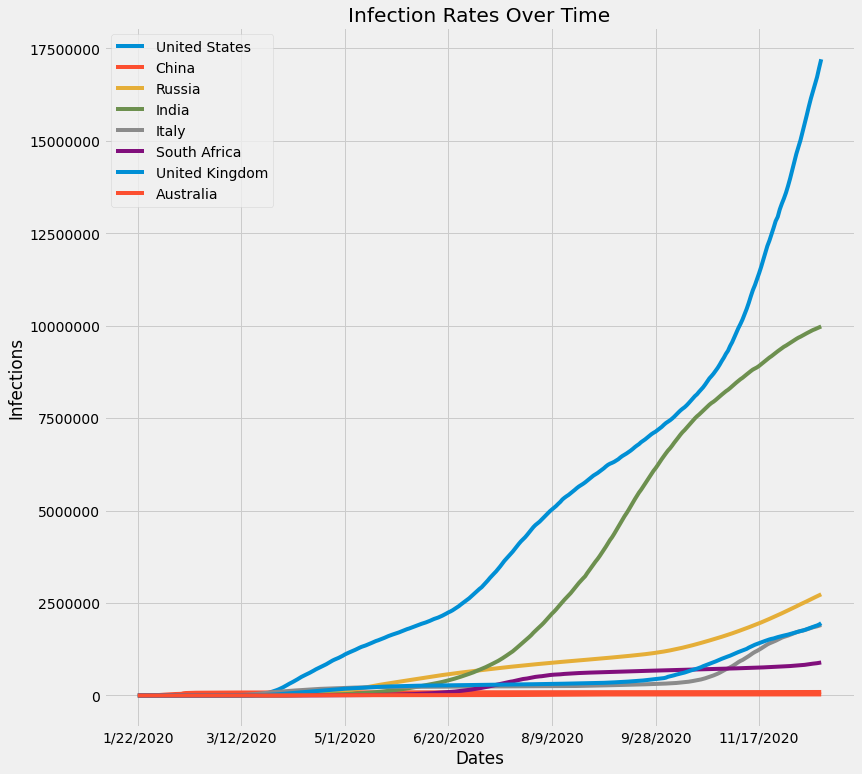

In [18]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,12))

df_aggregated.loc['United States'].plot()
df_aggregated.loc['China'].plot()
df_aggregated.loc['Russia'].plot()
df_aggregated.loc['India'].plot()
df_aggregated.loc['Italy'].plot()
df_aggregated.loc['South Africa'].plot()
df_aggregated.loc['United Kingdom'].plot()
df_aggregated.loc['Australia'].plot()
plt.xlabel('Dates') 
plt.ylabel('Infections') 
plt.title('Infection Rates Over Time')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.legend()

**Observation:** United States leads the number of infections followed by India. However, the other countries have much lower infection rates.

### 5.2 Examine the Total Number of Infections

Let's take a look at the total number of infections for each country.

In [19]:
# Isolate the total number of infections for each country
total_infections = df_aggregated.max(axis=1)

# Display the first five rows of 'max_infections'
total_infections.head()

Country/Region
Afghanistan    49378
Albania        51424
Algeria        93933
Andorra         7466
Angola         16484
dtype: int64

In [20]:
# Display the last five rows
total_infections.tail()

Country/Region
Vietnam                 1407
West Bank and Gaza    117755
Yemen                   2383
Zambia                 18504
Zimbabwe               11866
dtype: int64

### 5.3 Locate the Country with the Most Infections

In [21]:
# Determine the value for the most infections in a single day
total_infections.max()

17206647

In [22]:
# Examine the shape of 'total_infections'
total_infections.shape

(191,)

In [23]:
# Create a data frame with the column, 'Total Infections'
df_total = pd.DataFrame(total_infections, columns = ["Total Infections"])

In [24]:
# Check the first five rows
df_total.head()

,Total Infections
Country/Region,
Afghanistan,49378
Albania,51424
Algeria,93933
Andorra,7466
Angola,16484


In [25]:
# Find the country that had the most infections in a single day
df_total[df_total["Total Infections"] == 17206647]

,Total Infections
Country/Region,
United States,17206647


### 5.4 Find the Top 10 Countries with the Highest Numbers of Total Infections

In [26]:
# Create a new data frame where the values for 'Total Infections' in 'df_total' are sorted in descending order
df_total_sorted_dec = df_total.sort_values("Total Infections", ascending = False)

# Display the first 10 rows of the data frame
df_total_sorted_dec.head(10)

,Total Infections
Country/Region,
United States,17206647
India,9979447
Brazil,7110434
Russia,2736727
France,2483524
Turkey,1955680
United Kingdom,1954268
Italy,1906377
Spain,1785421


### 5.5 Find the Top 10 Countries with the Lowest Numbers of Total Infections

In [27]:
# Create a new data frame where the values for 'Total Infections' in 'df_total' are sorted in ascending order
df_total_sorted_asc = df_total.sort_values("Total Infections", ascending = True)

# Display the first 10 rows of the data frame
df_total_sorted_asc.head(10)

,Total Infections
Country/Region,
Vanuatu,1
Samoa,2
Marshall Islands,4
MS Zaandam,9
Solomon Islands,17
Holy See,27
Saint Kitts and Nevis,28
Timor-Leste,31
Laos,41


**Observation:** The U.S. leads the world in the most infections. But what is also interesting is that the top 10 countries with the highest number of COVID-19 infections are highly developed. 

### 5.4 The Average Value of Max Infections in A Day

In [28]:
# Find the average value
total_mean = df_total["Total Infections"].mean()

# Display the average value
print("The average value for the total number of infections: ", total_mean)

The average value for the total number of infections:  392421.5706806283


### 5.5 Analyzing the Spread of COVID-19 in the U.S.

#### 5.5.1 Visualizing the Overall Spread of the Virus: January 2020 to December 2020

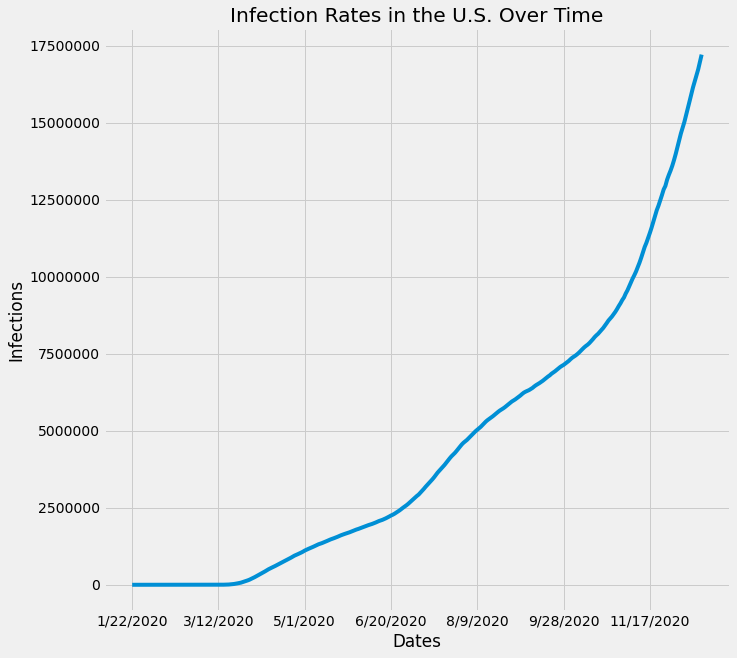

In [29]:
# Plot the infections over time for the US
plt.figure(figsize=(10,10))
plt.xlabel('Dates') 
plt.ylabel('Infections') 
plt.title('Infection Rates in the U.S. Over Time')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.style.use('fivethirtyeight')
df_aggregated.loc["United States"].plot()

#### 5.5.2 Visualizing U.S. Infection Rates in the First Week of the Pandemic

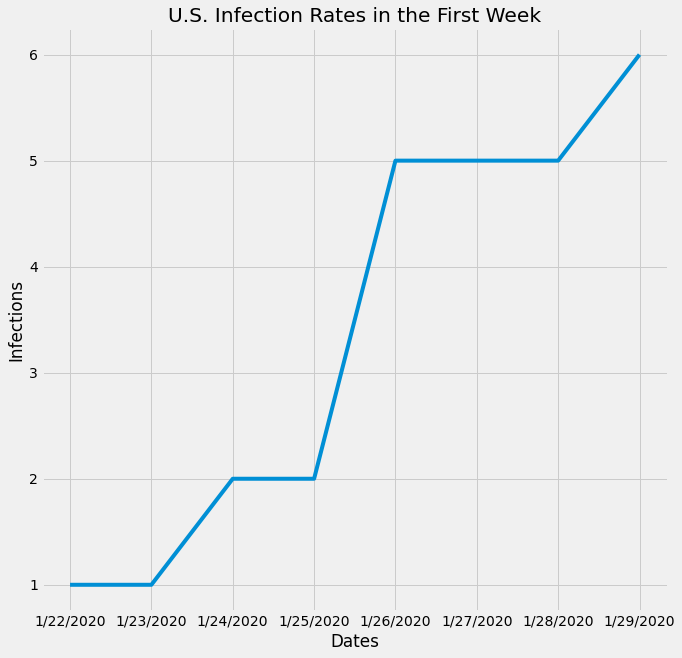

In [30]:
# Plot U.S. infections in the first week
plt.figure(figsize=(10,10))
plt.xlabel('Dates') 
plt.ylabel('Infections') 
plt.title('U.S. Infection Rates in the First Week')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.style.use('fivethirtyeight')
df_aggregated.loc["United States"][:8].plot()

#### 5.5.3 Visualizing U.S. Infection Rates During the First 30 Days

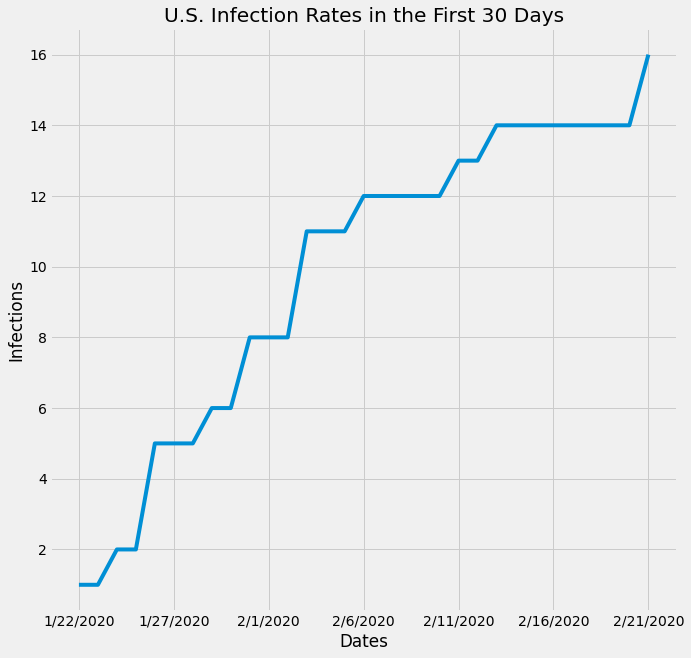

In [31]:
# Plot U.S. infections over the first 30 days
plt.figure(figsize=(10,10))
plt.xlabel('Dates') 
plt.ylabel('Infections') 
plt.title('U.S. Infection Rates in the First 30 Days')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.style.use('fivethirtyeight')
df_aggregated.loc["United States"][:31].plot()

#### 5.5.4 Visualizing U.S. Infection Rates During the Last 30 Days

Note that I will be visualizing the data up to December 18th 2020, which was the day that I accessed the data.

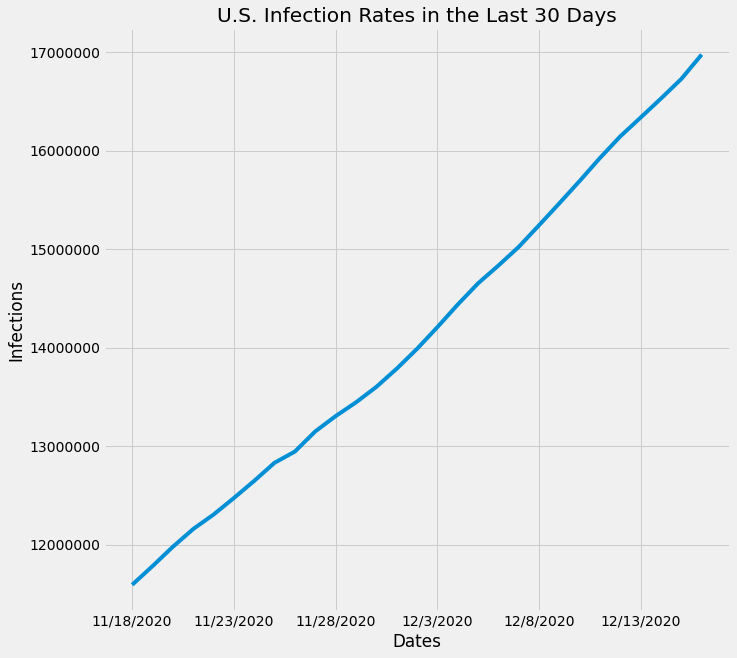

In [32]:
# Plot U.S. infections in the last 30 days
plt.figure(figsize=(10,10))
plt.xlabel('Dates') 
plt.ylabel('Infections') 
plt.title('U.S. Infection Rates in the Last 30 Days')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.style.use('fivethirtyeight')
df_aggregated.loc["United States"][-30:-1].plot()

## 6. Exploratory Data Analysis: World Happiness Report

In this section, I will perform exploratory data anlysis on the World Happiness Report. I'll use statistical analyses and visualizations to generate futher insights into our data.

### 6.1 Visualize the Data

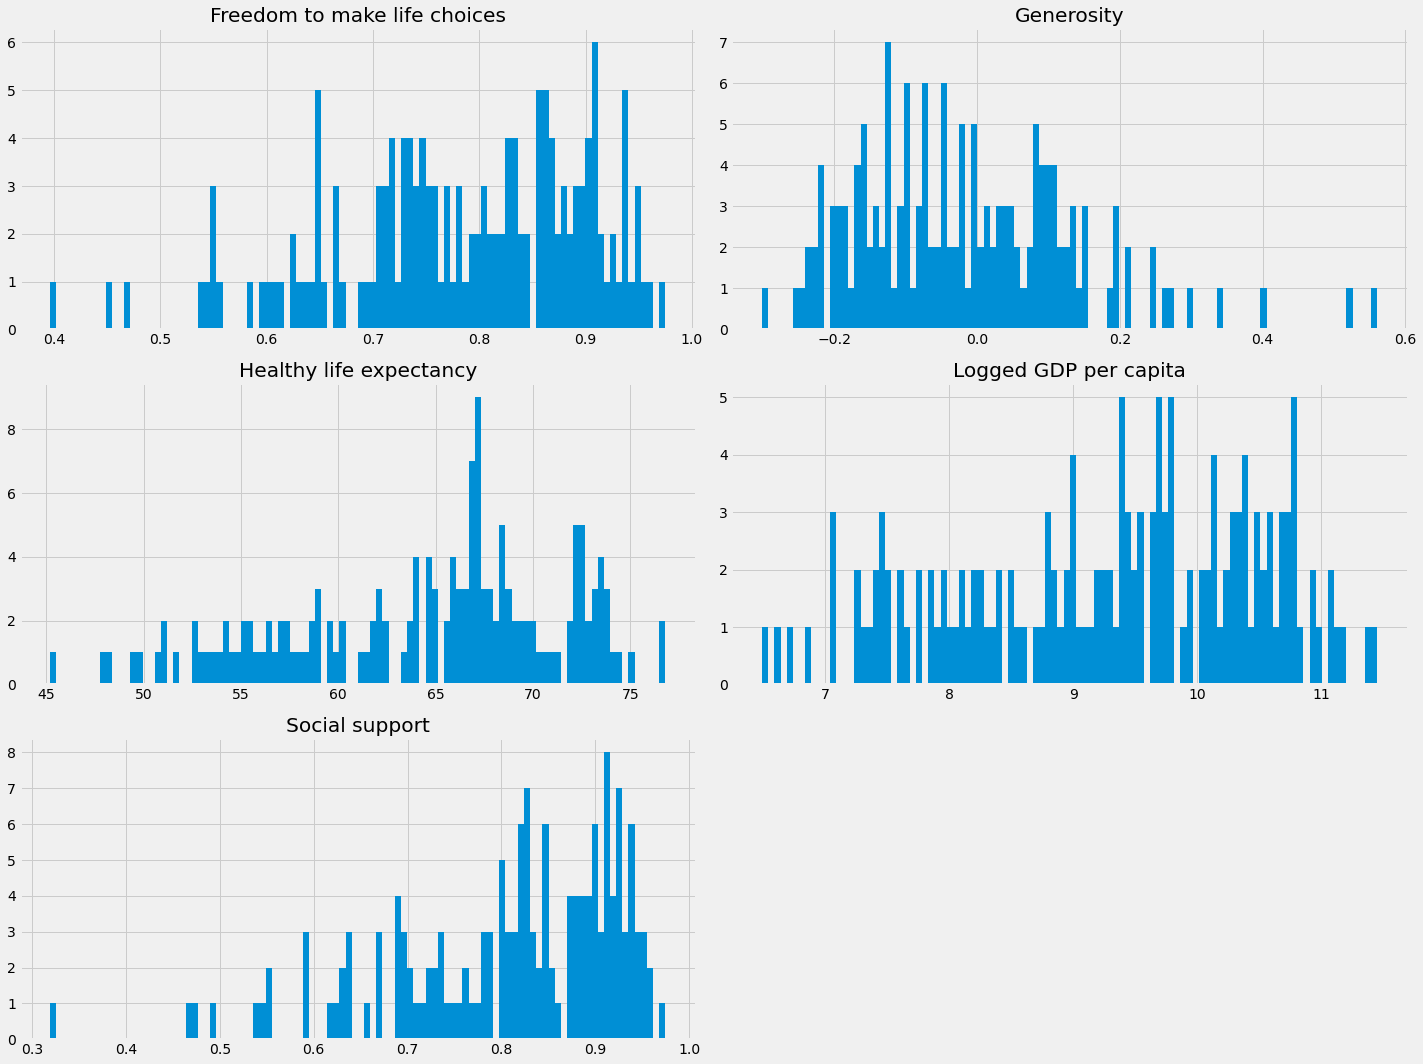

In [33]:
# Create histograms of the distributions for each attribute
df_whr.hist(bins=100, figsize=(20,15))
plt.style.use('fivethirtyeight')
plt.tight_layout()

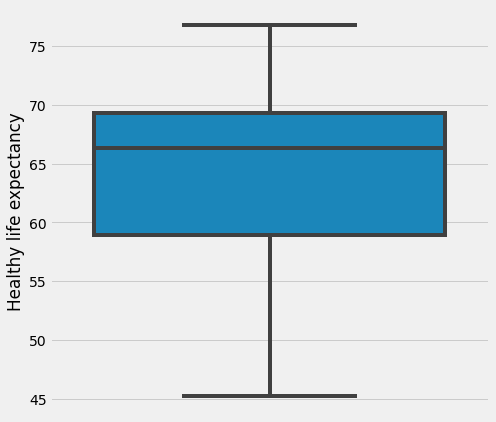

In [34]:
# Box plot of Healthy life expectancy
plt.figure(figsize=(7,7))
sns.boxplot(y=df_whr["Healthy life expectancy"])
plt.show()

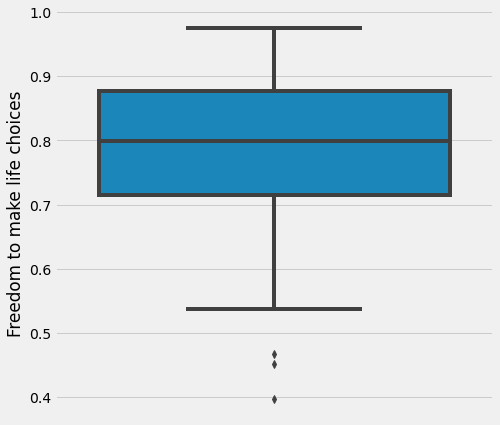

In [35]:
# Box plot of Freedom to make life choices
plt.figure(figsize=(7,7))
sns.boxplot(y=df_whr["Freedom to make life choices"])
plt.show()

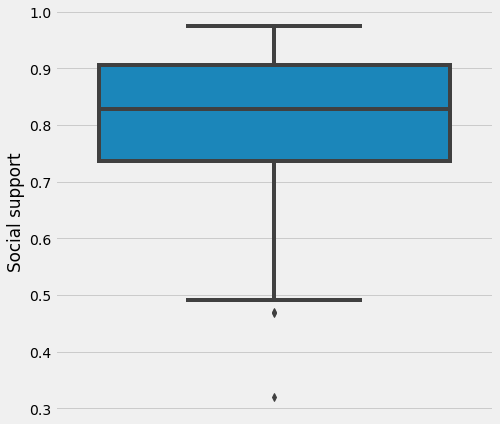

In [36]:
# Box plot of Social support
plt.figure(figsize=(7,7))
sns.boxplot(y=df_whr["Social support"])
plt.show()

### 6.2 Summary Statistics

In [37]:
# Use the describe() method to generate summary statistics
df_whr.describe()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,9.295706,0.808721,64.445529,0.783360,-0.014568
std,1.201588,0.121453,7.057848,0.117786,0.151809
min,6.492642,0.319460,45.200001,0.396573,-0.300907
25%,8.350645,0.737217,58.961712,0.714839,-0.127015
50%,9.456313,0.829204,66.305145,0.799805,-0.033665
75%,10.265124,0.906747,69.289192,0.877709,0.085429
max,11.450681,0.974670,76.804581,0.974998,0.560664


### 6.3 Correlation

In [38]:
# Display the correlations
df_whr.corr()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
Logged GDP per capita,1.000000,0.781814,0.848469,0.419019,-0.118399
Social support,0.781814,1.000000,0.742744,0.478863,-0.056780
Healthy life expectancy,0.848469,0.742744,1.000000,0.448846,-0.071852
Freedom to make life choices,0.419019,0.478863,0.448846,1.000000,0.253721
Generosity,-0.118399,-0.056780,-0.071852,0.253721,1.000000


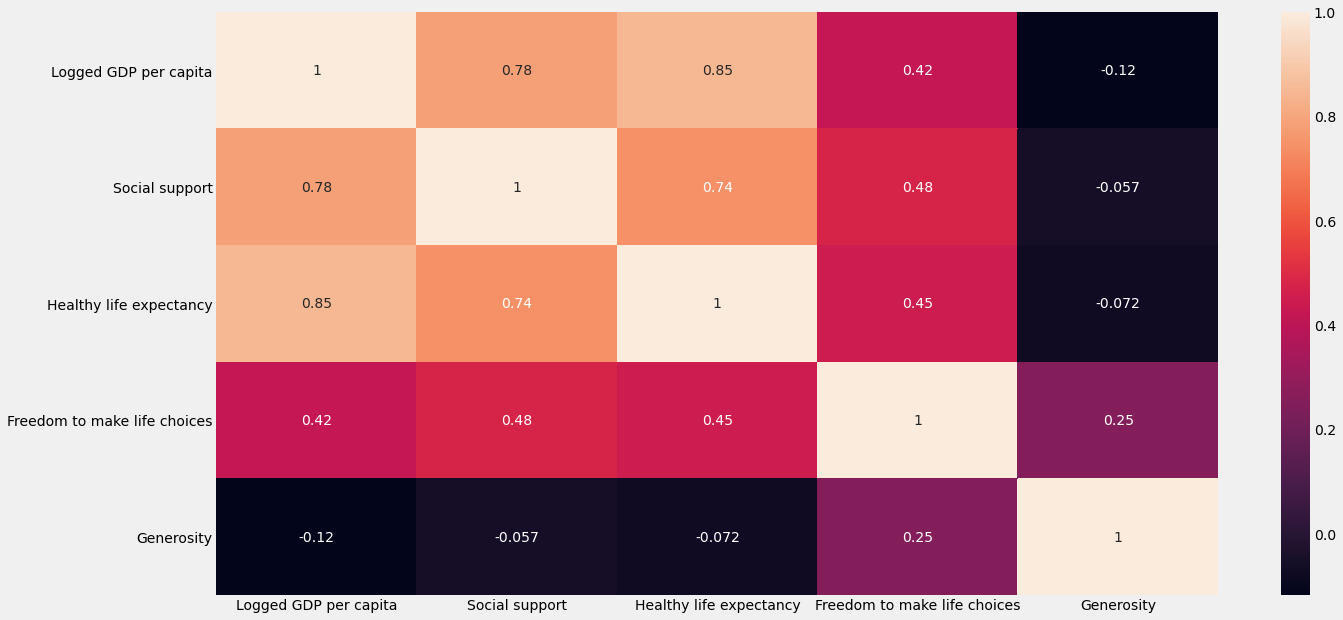

In [39]:
# Construct a heat map showing the strengths of the correlation
correlations = df_whr.corr()

f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(correlations, annot=True)

## 7. Calculating the Maximum Infection Rate For Each Country

Let's find some measure describing the infection rate within specific time periods. For my purpose, I'll use the maximum number of new, confirmed cases of COVID-19 in a single day (24 hours). We can calculate the maximum rate of infection for a country, *x*, by calculating the first derivative of the curve of the line depicting the number of infections *x* achieved over time.

### 7.1 Calculate and Plot the First Derivative of U.S. Infecion Rates From January to December

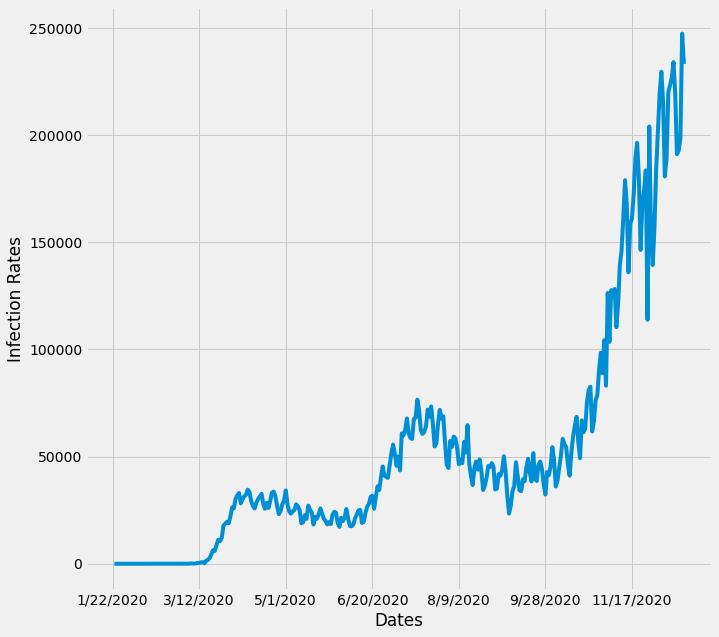

In [40]:
# Create the plot
plt.figure(figsize=(10,10))
plt.xlabel('Dates') 
plt.ylabel('Infection Rates') 
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.style.use('fivethirtyeight')
df_aggregated.loc["United States"].diff().plot()

**Observation:** This shows the change in U.S. infection rates each day. We can see that infection rates became much higher later in the year.

### 7.2 Calculate the Maximum Infection Rate for the U.S.

In this section, I'm going to calculate the value for the maximum infection rate in the United States.

In [41]:
# Determine the maximum infection rate in the U.S.
df_aggregated.loc["United States"].diff().max()

247403.0

Let's compare this number with China's maximum infection rate.

In [42]:
# Determine the maximum infection rate in China
df_aggregated.loc["China"].diff().max()

15136.0

### 7.3 Calculate the Maximum Infection Rates for Each Country

I'll use a for loop to calculate the maximum infection rate for each country. Afterwards, I'll create a new data frame that contains these values. The subsequent data frame will ultimately be merged with the *World Happiness Report* data frame for futher regression analysis.

In [43]:
# Create a list containing the names of countries in the data
countries = list(df_aggregated.index)

# Create an empty list to store maximum infection rate values
max_infection_rate = []

# Create the for loop to get each country's maximum infection rate
for country in countries :
    max_infection_rate.append(df_aggregated.loc[country].diff().max())
    
# Display the contents of the list, 'max_infection_rates'
max_infection_rate

[915.0,
 879.0,
 1133.0,
 299.0,
 355.0,
 39.0,
 18326.0,
 2476.0,
 716.0,
 9586.0,
 4451.0,
 310.0,
 841.0,
 4019.0,
 12.0,
 1975.0,
 23921.0,
 1382.0,
 139.0,
 29.0,
 2036.0,
 1953.0,
 1328.0,
 70574.0,
 26.0,
 4828.0,
 315.0,
 2158.0,
 78.0,
 159.0,
 31.0,
 2324.0,
 8377.0,
 216.0,
 83.0,
 13990.0,
 15136.0,
 13056.0,
 44.0,
 649.0,
 414.0,
 2877.0,
 430.0,
 4620.0,
 124.0,
 827.0,
 15731.0,
 4036.0,
 99.0,
 280.0,
 8.0,
 2147.0,
 11536.0,
 1774.0,
 885.0,
 1750.0,
 55.0,
 757.0,
 147.0,
 1829.0,
 5.0,
 840.0,
 106091.0,
 570.0,
 248.0,
 5450.0,
 33825.0,
 1513.0,
 3316.0,
 26.0,
 4233.0,
 278.0,
 156.0,
 133.0,
 332.0,
 7.0,
 1324.0,
 6819.0,
 106.0,
 97894.0,
 8369.0,
 14051.0,
 5055.0,
 1515.0,
 9078.0,
 40902.0,
 244.0,
 3199.0,
 7933.0,
 18757.0,
 1554.0,
 1078.0,
 2220.0,
 1073.0,
 11505.0,
 14.0,
 1040.0,
 2817.0,
 98.0,
 97.0,
 1639.0,
 52.0,
 4551.0,
 1967.0,
 7.0,
 614.0,
 257.0,
 2234.0,
 215.0,
 155.0,
 218.0,
 3.0,
 296.0,
 41.0,
 28115.0,
 1766.0,
 29.0,
 56.0,
 874.0,

### 7.4 Create a New Column with the Maximum Infection Rates for Each Country

In [44]:
# Create a new column with the values for maximum infection rates
df_aggregated["Max Infection Rate"] = max_infection_rate

# Display the first five rows of the new data frame
df_aggregated.head()

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,12/9/2020,12/10/2020,12/11/2020,12/12/2020,12/13/2020,12/14/2020,12/15/2020,12/16/2020,12/17/2020,Max Infection Rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,47851,48053,48116,48229,48527,48718,48952,49161,49378,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,45188,46061,46863,47742,48530,49191,50000,50637,51424,879.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,90014,90579,91121,91638,92102,92597,93065,93507,93933,1133.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,7162,7190,7236,7288,7338,7382,7382,7446,7466,299.0
Angola,0,0,0,0,0,0,0,0,0,0,...,15804,15925,16061,16161,16188,16277,16362,16407,16484,355.0


In [45]:
# Display the last five rows
df_aggregated.tail()

,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,12/9/2020,12/10/2020,12/11/2020,12/12/2020,12/13/2020,12/14/2020,12/15/2020,12/16/2020,12/17/2020,Max Infection Rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Vietnam,0,2,2,2,2,2,2,2,2,2,...,1381,1385,1391,1395,1397,1402,1405,1405,1407,50.0
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,102992,104879,106622,108099,109738,111102,113409,115606,117755,2516.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,2079,2081,2082,2083,2083,2084,2085,2085,2087,116.0
Zambia,0,0,0,0,0,0,0,0,0,0,...,18062,18091,18161,18217,18274,18322,18428,18456,18504,915.0
Zimbabwe,0,0,0,0,0,0,0,0,0,0,...,11007,11081,11162,11219,11246,11358,11522,11749,11866,490.0


## 8. Data Cleaning

In this section I'm going to clean the data, handle missing values, format column names, and correct data types.

### 8.1 Missing Values

In [46]:
# Locate any missing values in df_max
df_aggregated.isnull().sum()

1/22/2020             0
1/23/2020             0
1/24/2020             0
1/25/2020             0
1/26/2020             0
                     ..
12/14/2020            0
12/15/2020            0
12/16/2020            0
12/17/2020            0
Max Infection Rate    0
Length: 332, dtype: int64

In [47]:
# Locate missing values in df_whr
df_whr.isnull().sum()

Country name                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
dtype: int64

### 8.2 Data Types

In [48]:
# check data types for df_max
df_aggregated.dtypes

1/22/2020               int64
1/23/2020               int64
1/24/2020               int64
1/25/2020               int64
1/26/2020               int64
                       ...   
12/14/2020              int64
12/15/2020              int64
12/16/2020              int64
12/17/2020              int64
Max Infection Rate    float64
Length: 332, dtype: object

In [49]:
# check data types for df_whr
df_whr.dtypes

Country name                     object
Logged GDP per capita           float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
dtype: object

**Remark:** The data types look good. We also do not have any missing values.

### 8.3 Format Column Names

I will now adjust the column names. First, I'll set the names to have a title format. Second, I'll shorten the names for readability and clarity.

In [50]:
# Examine the column names for df_max
df_aggregated.columns

Index(['1/22/2020', '1/23/2020', '1/24/2020', '1/25/2020', '1/26/2020',
       '1/27/2020', '1/28/2020', '1/29/2020', '1/30/2020', '1/31/2020',
       ...
       '12/9/2020', '12/10/2020', '12/11/2020', '12/12/2020', '12/13/2020',
       '12/14/2020', '12/15/2020', '12/16/2020', '12/17/2020',
       'Max Infection Rate'],
      dtype='object', length=332)

In [51]:
# Examine the column names fo df_whr
df_whr.columns

Index(['Country name', 'Logged GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices',
       'Generosity'],
      dtype='object')

In [52]:
# Rename the columns
df_whr.rename(columns={"Country name": "Country", "Logged GDP per capita":"GDP per capita", "Social support":"Social Support", "Healthy life expectancy":"Life Expectancy", "Freedom to make life choices":"Freedom to Choose", "Generosity":"Generosity"}, inplace=True)

# Display the columns
df_whr.columns

Index(['Country', 'GDP per capita', 'Social Support', 'Life Expectancy',
       'Freedom to Choose', 'Generosity'],
      dtype='object')

### 8.4 Feature Selection

In order to perform linear regression I must join the data frames. But before I do that, I want to perform additional feature selection. Specifically, I will filter out the individual date columns in df_aggregated while preserving the 'Max Infection Rate' column.

In [53]:
# Create a new data frame with the column, 'Max Infection Rate'
df_max = pd.DataFrame(df_aggregated["Max Infection Rate"])

# Display the first five rows of the column
df_max.head()

,Max Infection Rate
Country/Region,
Afghanistan,915.0
Albania,879.0
Algeria,1133.0
Andorra,299.0
Angola,355.0


## 9. Join the Data Frames

I can now merge the data frames together using an inner join.

In [54]:
df_whr.shape

(153, 6)

In [55]:
df_max.shape

(191, 1)

In [56]:
# Reset the indices of the df_whr data frame
df_whr.set_index(["Country"],inplace=True)

# Check the first five rows
df_whr.head()

,GDP per capita,Social Support,Life Expectancy,Freedom to Choose,Generosity
Country,,,,,
Finland,10.639267,0.954330,71.900825,0.949172,-0.059482
Denmark,10.774001,0.955991,72.402504,0.951444,0.066202
Switzerland,10.979933,0.942847,74.102448,0.921337,0.105911
Iceland,10.772559,0.974670,73.000000,0.948892,0.246944
Norway,11.087804,0.952487,73.200783,0.955750,0.134533


In [57]:
# Join the data frames
df = df_whr.join(df_max, how = "inner").copy()

# Check the first 20 rows
df.head(20)

,GDP per capita,Social Support,Life Expectancy,Freedom to Choose,Generosity,Max Infection Rate
Finland,10.639267,0.954330,71.900825,0.949172,-0.059482,840.0
Denmark,10.774001,0.955991,72.402504,0.951444,0.066202,4036.0
Switzerland,10.979933,0.942847,74.102448,0.921337,0.105911,21926.0
Iceland,10.772559,0.974670,73.000000,0.948892,0.246944,106.0
Norway,11.087804,0.952487,73.200783,0.955750,0.134533,1680.0
Netherlands,10.812712,0.939139,72.300919,0.908548,0.207612,12871.0
Sweden,10.758794,0.926311,72.600769,0.939144,0.111615,20931.0
New Zealand,10.500943,0.949119,73.202629,0.936217,0.191598,89.0
Austria,10.742824,0.928046,73.002502,0.899989,0.085429,9586.0
Luxembourg,11.450681,0.906912,72.599998,0.905636,-0.004621,1967.0


In [58]:
# Check the last 20 rows
df.tail(20)

,GDP per capita,Social Support,Life Expectancy,Freedom to Choose,Generosity,Max Infection Rate
Comoros,7.833630,0.625662,57.349010,0.547613,0.090008,44.0
Togo,7.357711,0.551313,54.719898,0.649829,0.002668,58.0
Ethiopia,7.509386,0.743307,58.639591,0.740795,0.043377,1829.0
Madagascar,7.281686,0.668196,59.105427,0.557574,-0.011824,614.0
Egypt,9.316542,0.735448,61.780151,0.708354,-0.196878,1774.0
Sierra Leone,7.268803,0.636142,50.865143,0.715315,0.088661,86.0
Burundi,6.492642,0.490326,53.400002,0.626350,-0.017552,78.0
Zambia,8.224720,0.698824,55.299377,0.806500,0.078037,915.0
Haiti,7.411329,0.593248,55.598625,0.537825,0.400535,332.0
Lesotho,7.960488,0.780496,48.003624,0.738126,-0.145732,98.0


In [59]:
# Check the shape of the new data frame
df.shape

(142, 6)

In [60]:
# Check for null values
df.isnull().sum()

GDP per capita        0
Social Support        0
Life Expectancy       0
Freedom to Choose     0
Generosity            0
Max Infection Rate    0
dtype: int64

In [61]:
# Apply the info method
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, Finland to Afghanistan
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GDP per capita      142 non-null    float64
 1   Social Support      142 non-null    float64
 2   Life Expectancy     142 non-null    float64
 3   Freedom to Choose   142 non-null    float64
 4   Generosity          142 non-null    float64
 5   Max Infection Rate  142 non-null    float64
dtypes: float64(6)
memory usage: 7.8+ KB


**Remarks** It should be noted that the join was successful, and we have a new, fully populated data frame. However, the number of rows in the new data frame, *df*, is less than the number of rows in the previous data frames. This is likely due to differences in the names of countries. Moreover, one data frame could list a region that is not listed in the other data frame. But this will not cause any severe or major negative consequences in the final part of this project. Now, I could go back and rename all instances of misnamed countries and regions. But this is not necessary. First, we have enough data to carry out meaningful analyses of the data. Second, our data frame, *df*, contains the countries that are of primary interest.

## 10. More Correlation

Let's create a correlation matrix using the new data frame, *df*. We should pay close attention to the correlation between *Max Infection Rate* and the features from the *World Happiness Report*.

In [62]:
# Create the Correlation matrix
df.corr()

,GDP per capita,Social Support,Life Expectancy,Freedom to Choose,Generosity,Max Infection Rate
GDP per capita,1.000000,0.789920,0.857504,0.442085,-0.124830,0.142581
Social Support,0.789920,1.000000,0.765550,0.488072,-0.063844,0.067576
Life Expectancy,0.857504,0.765550,1.000000,0.479713,-0.080884,0.098161
Freedom to Choose,0.442085,0.488072,0.479713,1.000000,0.232441,-0.084468
Generosity,-0.124830,-0.063844,-0.080884,0.232441,1.000000,-0.075275
Max Infection Rate,0.142581,0.067576,0.098161,-0.084468,-0.075275,1.000000


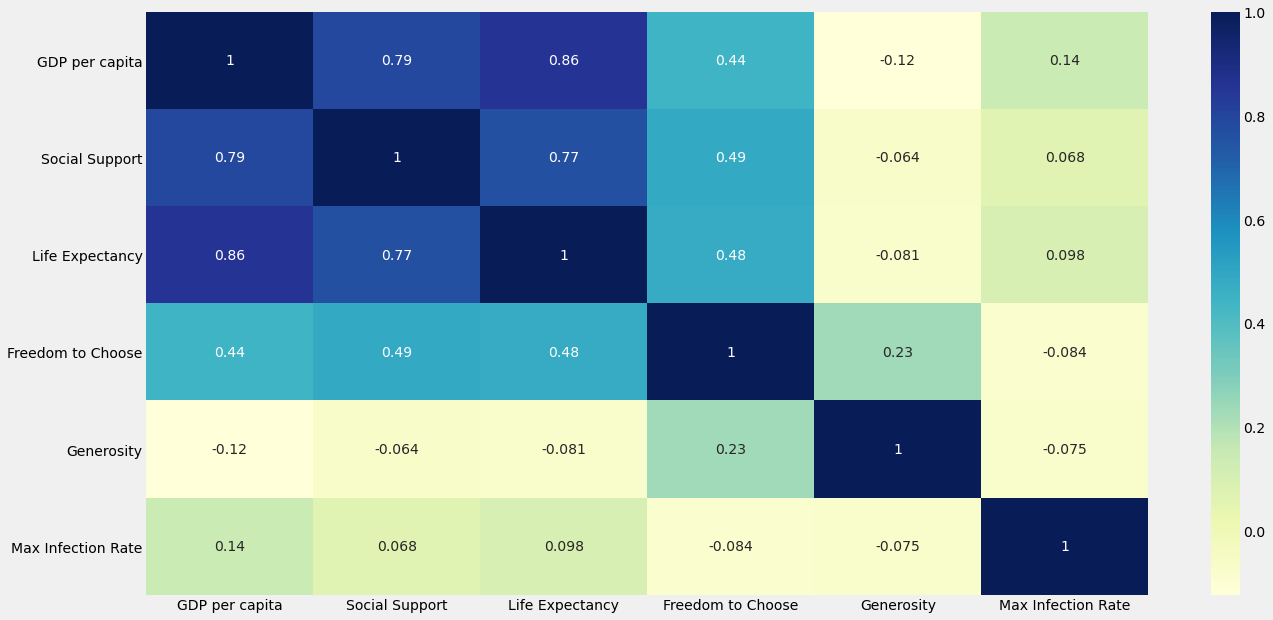

In [63]:
# Create the heat map
correlation_heat_map = df.corr()

f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(correlation_heat_map, cmap="YlGnBu", annot=True)

## 11. Linear Regression

In this section, I will create several simple linear regression plots with *Max Infection Rate* on the Y-axis (the dependent variable). I will employ the features *GDP per capita*, *Social Support*, *Life Expectancy*, *Freedom to Choose*, and *Generosity* as predictor variables. Pearson correlation coeffiecients and P-values will be generated to evaluate the models.

### 11.1 GDP per capita and Maximum Infections

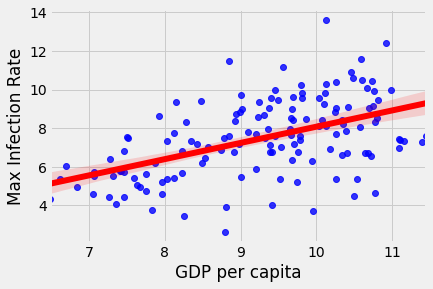

In [64]:
# Create a regression plot with 'GDP per capita' as the predictor
x1 = df["GDP per capita"]
y1 = df["Max Infection Rate"]
sns.regplot(x1, np.log(y1), scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [65]:
# Get the Pearson Correlation Coefficient and P-value
pearson_coef, p_value = stats.pearsonr(df["GDP per capita"], df["Max Infection Rate"])

# display the Pearson Correlation coefficient and the P-value
print("The Pearson correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson correlation Coefficient is 0.14258088696847046  with a P-value of P =  0.09051458721925132


### 11.2 Life Expectancy and Maximum Infections

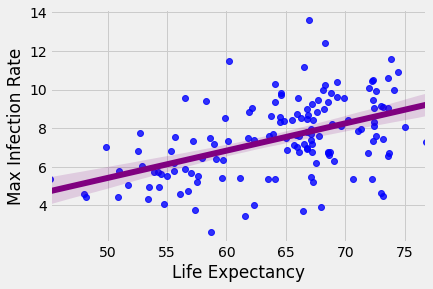

In [66]:
# Create a regression with 'Life Expectancy' as the predictor
x2 = df["Life Expectancy"]
y2 = df["Max Infection Rate"]
sns.regplot(x2, np.log(y2), scatter_kws={"color": "blue"}, line_kws={"color": "purple"})

In [67]:
# Get the Pearson Correlation Coefficient and P-value
pearson_coef, p_value = stats.pearsonr(df["Life Expectancy"], df["Max Infection Rate"])

# display the Pearson Correlation coefficient and the P-value
print("The Pearson correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson correlation Coefficient is 0.09816077600293456  with a P-value of P =  0.24515789892983564


### 11.3 Freedom to Choose and Maximum Infections

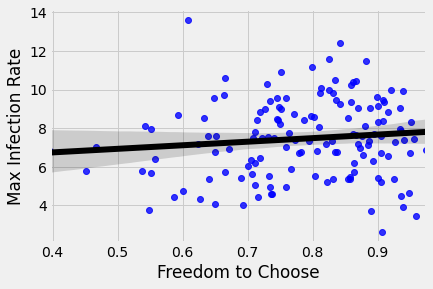

In [68]:
# Create a regression plot with 'Freedom to Choose' as the predictor
x3 = df["Freedom to Choose"]
y3 = df["Max Infection Rate"]
sns.regplot(x3, np.log(y3), scatter_kws={"color": "blue"}, line_kws={"color": "black"})

In [69]:
# Get the Pearson Correlation Coefficient and P-value
pearson_coef, p_value = stats.pearsonr(df["Freedom to Choose"], df["Max Infection Rate"])

# display the Pearson Correlation coefficient and the P-value
print("The Pearson correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson correlation Coefficient is -0.08446757669996667  with a P-value of P =  0.31758244718501466


### 11.4 Social Support and Maximum Infections

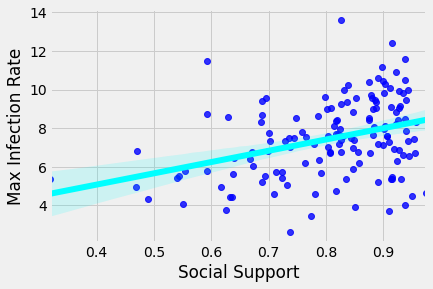

In [70]:
# Create a regression plot with 'Social Support' as the predictor
x4 = df["Social Support"]
y4 = df["Max Infection Rate"]
sns.regplot(x4, np.log(y4), scatter_kws={"color": "blue"}, line_kws={"color": "cyan"})

In [71]:
# Get the Pearson Correlation Coefficient and P-value
pearson_coef, p_value = stats.pearsonr(df["Social Support"], df["Max Infection Rate"])

# display the Pearson Correlation coefficient and the P-value
print("The Pearson correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson correlation Coefficient is 0.06757625144216743  with a P-value of P =  0.42425535060608477


### 11.5 Generosity and Maximum Infections

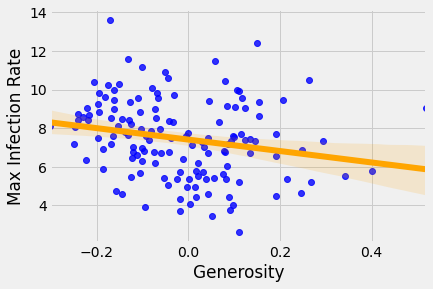

In [72]:
# Create a regression plot with 'Generosity' as the predictor
x5 = df["Generosity"]
y5 = df["Max Infection Rate"]
sns.regplot(x5, np.log(y5), scatter_kws={"color": "blue"}, line_kws={"color": "orange"})

In [73]:
# Get the Pearson Correlation Coefficient and P-value
pearson_coef, p_value = stats.pearsonr(df["Generosity"], df["Max Infection Rate"])

# display the Pearson Correlation coefficient and the P-value
print("The Pearson correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson correlation Coefficient is -0.07527541047566519  with a P-value of P =  0.3732802765665282


#### Observations

Our plots and correlation matrix show that there is some positive correlation between *Max Infection Rate* and several independent variables including *GDP per capita*, *Life expectancy*, and *Social Support*. Moreover, our analyses suggest that the spread of the virus is greater in more developed countries. That is to say, countries with greater scores for GDP per capita and Healthy Life Expectancy will experience greater infection rates.

## 12. Construct a Multiple Regression Model

Given the initial analysis consisting of the simple linear regression plots, I'll now construct a multiple linear regression model. To do this, I'll first normalize the data using the following formula: **normalized data = original value/maximum value of the feature.** Normalizing the data will convert all the values into a similar range. Next, I'll split the data into two sets: a set of input variables and a set containing the output/target variable. Afterwards, I'll split the data into training and testing sets. Finally, I'll fit and evaluate a multiple regression model.

#### Predictors

Based on the simple linear regression models I build above, along with their Pearson Correlation Coeffiecient scores and P-values, I'll use the following variables as predictors: *GDP per capita* and *Life Expectancy*.

### 12.1 Normalize the data

I need to normalize the data so that the values for the variables share a similar range. This will help when I train the multiple regression model.

In [74]:
# Note the columns
df.columns

Index(['GDP per capita', 'Social Support', 'Life Expectancy',
       'Freedom to Choose', 'Generosity', 'Max Infection Rate'],
      dtype='object')

In [75]:
# Normalize the variables in the data frame
df["GDP per capita"] = df["GDP per capita"]/df["GDP per capita"].max()
df["Social Support"] = df["Social Support"]/df["Social Support"].max()
df["Life Expectancy"] = df["Life Expectancy"]/df["Life Expectancy"].max()
df["Freedom to Choose"] = df["Freedom to Choose"]/df["Freedom to Choose"].max()
df["Generosity"] = df["Generosity"]/df["Generosity"].max()
df["Max Infection Rate"] = df["Max Infection Rate"]/df["Max Infection Rate"].max()

### 12.2 Prepare and Process the Data

In this part, I will carve the data into two sets containing the input/predictor variables and the output/target variable. Based on the P-values and Pearson Correlation Coefficient values, my predictor variables will be *GDP per capita* and *Life Expectancy*.

In [76]:
# Carve the data into sets of input features
X = df.drop(columns = ["Max Infection Rate", "Generosity", "Freedom to Choose", "Social Support"])

# Display the first five rows of X
X.head()

,GDP per capita,Life Expectancy
Finland,0.929138,0.936153
Denmark,0.940905,0.942685
Switzerland,0.958889,0.964818
Iceland,0.940779,0.950464
Norway,0.968310,0.953078


In [77]:
# Check the shpae
X.shape

(142, 2)

In [78]:
# Carve the data into a set of ouputs - i.e., the target variable, 'y'
y = df["Max Infection Rate"]

# Display first five rows of y
y.head()

Finland        0.001020
Denmark        0.004903
Switzerland    0.026634
Iceland        0.000129
Norway         0.002041
Name: Max Infection Rate, dtype: float64

In [79]:
# Check the shape
y.shape

(142,)

### 12.3 Split the Data into Training and Testing Sets

In [80]:
# Apply train_test_split to split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### 12.4 Train and Fit a Multiple Regression Model

In [81]:
# Instantiate a linear regression objects
LinearRegression_model = LinearRegression()

In [82]:
# Apply the fit method to the object and pass it the training data for X
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

### 12.5 Evaluate the Model

In [83]:
# Retrieve an accuracy score for the first model by using the testing data
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)

# Display the score
accuracy_LinearRegression

0.06466451053682698

#### Observations

I've successfully constructed a multiple linear regression model. Our analysis shows that their is positive correlation between the target, *Max Infection Rate*, and the predictors, *GDP per capita* and *Life Expectancy*. However, the R-squared score of the multiple linear regression model is fairly low, which indicates that the model has trouble fitting the data.

## 13. Summary and Results

### Summary

In this project, I analyzed data concerning global COVID-19 infection and social and economic factors contributing to a state's happiness. My aims were the following: (1) to explore the global spread of COVID-19; (2) to examine the infection rate of COVID-19 in the United States; (3) to compare the U.S. infection rate with infection rates in other countries; and (4) to build a regression model that predicts maximum infection rate in a country based on certain social and economic factors.

### Important Results

My analysis produced several noteworthy results.
1. The United States had the highest rate of COVID-19 infections from January 2020 to December 2020.
2. The top 10 countries with the highest number of total infections were the following (in order from highest to lowest): United States (17206647), India (9979447), Brazil	(7110434), Russia (2736727), France	(2483524), Turkey (1955680), United Kingdom	(1954268), Italy (1906377), Spain (1785421), and Argentina (1524372).
3. The top 10 countries with the least amount of total infections were the following: Vanuatu (1), Samoa (2), Marshall Islands (4), MS Zaandam (9), Solomon Islands	(17), Holy See	(27), Saint Kitts and Nevis	(28), Timor-Leste (31), Laos (41), and Fiji	(46).
4. The United States also had the highest masimum infection rate within a single day. This was calculated to be 247403 new COVID-19 cases in a single 24 hour period.
5. There is a positive correlation between a country's maximum infection rate and the variables *GDP per capita*, *Life Expectancy*, and *Social Support*. Both *GDP per capita* and *Life Expectancy* provided the most correlation with the target.
6. We can construct a mulitple regression model using both *GDP per capita* and *Life Expectancy* as predictors. But the R-squared score achieved is only 0.1120898004917733.

### Discussion

The results suggest several interesting things. 
1. COVID-19 infections are much more severe in highly developed countries like the United States. This is intriguing, as you would think that countries with higher scores for GDP per capita and healthy life expectancy might be better at combatting the virus. However, the higher infection rates for these countries might also be due to the fact that they have the resources to test more people and provide more data about the numbers of infected people.
2. Island nations typically have the lowest amount of COVID-19 infections. This is not surprising. For these countries are small and secluded. They therefore have a natural buffer that helps to insulates them from COVID-19.
3. The infection rate of the U. S. is surprising when you compare it to similar countries. It would be interesting to do further research to determine why this is the case.
4. I was able to show that there is a positive correlation between maximum infection rates of a country and certain social and economic factors. The best predictors were GDP per capita and Life Expectancy. However, I was not able to construct a highly accurate multiple regression model. This suggests that we caould look at other social and economic factors to help explain infection rates.